# CMPINF 0010: Best Neighborhood - Pools Capacity
## Group member: Lingfeng Fan

Pools capacity is one of our submetrics to determine which of neighborhoods in Pittsburgh is the best.

In this notebook, I'm using a dataset reflected pools capacity as well as which neighborhood they belong to. This dataset specifically has a column of neighborhood, which helps me to effectively collect capacity attribute for every neighborhood. Noticed that is is possible to have multiple pools in the same neighborhood.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# load the data from csv
pools = pd.read_csv("neighborhood_pools.csv")
pools.head(10)


,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461997,-79.953313
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405073,-79.936899
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458746,-79.988369
6,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453099,-79.871039
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482019,-79.911283
8,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482178,-79.910931
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454370,-79.899884


As we can tell based on the output generated by the previous cell, the data contains way too many unnecessary data attributes, since we only care about each pool's capacity and which neighborhood it belongs to, let's trim it before moving forward.

In [3]:
pools_trim = pools[['id', 'name', 'capacity', 'neighborhood']]

pools_trim.head(10)

,id,name,capacity,neighborhood
0,899591542,Ammon,538000.0,Bedford Dwellings
1,1003800828,Banksville,166320.0,Banksville
2,1688544652,Beechview Spray Park,NaN,Beechview
3,1533382756,Bloomfield,335000.0,Bloomfield
4,1287441950,Burgwin Spray Park,NaN,Hazelwood
5,168387727,Cowley Spray Park,NaN,Troy Hill
6,1569871328,East Hills Spray Park,NaN,East Hills
7,1475037865,Highland - Children,NaN,Highland Park
8,5446687,Highland - Main,560242.0,Highland Park
9,878134116,Homewood,171075.0,Homewood South


As we can tell from the generated table, there are some pools with NaN(missing value) capacity. Since capacity is our standard to determine the best neighborhood, we need to repace  NaN capacity with 0 first.

In [4]:
pools_trim['capacity'] = pools_trim['capacity'].fillna(0)

pools_trim.head(10)

<ipython-input-4-452bc0b003ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pools_trim['capacity'] = pools_trim['capacity'].fillna(0)


,id,name,capacity,neighborhood
0,899591542,Ammon,538000.0,Bedford Dwellings
1,1003800828,Banksville,166320.0,Banksville
2,1688544652,Beechview Spray Park,0.0,Beechview
3,1533382756,Bloomfield,335000.0,Bloomfield
4,1287441950,Burgwin Spray Park,0.0,Hazelwood
5,168387727,Cowley Spray Park,0.0,Troy Hill
6,1569871328,East Hills Spray Park,0.0,East Hills
7,1475037865,Highland - Children,0.0,Highland Park
8,5446687,Highland - Main,560242.0,Highland Park
9,878134116,Homewood,171075.0,Homewood South


Let's take a look at their rough ranking based on each pool's capacity first!


In [5]:
pools_trim = pools_trim.sort_values('capacity', ascending=False)

pools_trim

,id,name,capacity,neighborhood
8,5446687,Highland - Main,560242.0,Highland Park
0,899591542,Ammon,538000.0,Bedford Dwellings
14,2077053611,Moore,417657.0,Brookline
18,43656340,Ream,356000.0,Mount Washington
3,1533382756,Bloomfield,335000.0,Bloomfield
21,976230017,Sheraden,278000.0,Sheraden
22,927599833,Sue Murray,271000.0,Allegheny Center
17,1704750315,Phillips - Main,224100.0,Carrick
24,558965267,West Penn,215451.0,Polish Hill
10,2092220498,Jack Stack,205800.0,Brighton Heights


But what if each neighborhood has multiple pools and the total capacity becomes much larger? Here I'm creating a mini HashMap class for the sake of convenience to categorize pools that are located in the same neighborhood. The key of this hashmap are neighborhoods, and the values correspond to pool capacities, so we can have a comprehensive analysis of pool capacities for each neighborhood.

In [8]:
# hashmap

class HashMap:
    def __init__(self):
        self.hash_map = {}

    def set_val(self, key, value):
        self.hash_map[key] = value

    def get_val(self, key):
        return self.hash_map.get(key)

    def del_val(self, key):
        if key in self.hash_map:
            del self.hash_map[key]

hash_map = HashMap()

for index, row in pools_trim.iterrows():
    if hash_map.get_val(row['neighborhood']) is None:
        hash_map.set_val(row['neighborhood'], row['capacity'])
    else:
        temp = hash_map.get_val(row['neighborhood'])
        hash_map.set_val(row['neighborhood'], temp+row['capacity'])
    
print(hash_map.hash_map)
    

{'Highland Park': 560242.0, 'Bedford Dwellings': 538000.0, 'Brookline': 417657.0, 'Mount Washington': 356000.0, 'Bloomfield': 335000.0, 'Sheraden': 278000.0, 'Allegheny Center': 271000.0, 'Carrick': 224100.0, 'Polish Hill': 215451.0, 'Brighton Heights': 205800.0, 'Perry North': 205800.0, 'South Side Flats': 312800.0, 'Greenfield': 195000.0, 'Squirrel Hill South': 187600.0, 'Homewood South': 171075.0, 'Banksville': 166320.0, 'Westwood': 156840.0, 'Lincoln Place': 18000.0, 'Hazelwood': 0.0, 'Shadyside': 0.0, 'Beechview': 0.0, 'Beltzhoover': 0.0, 'East Hills': 0.0, 'Troy Hill': 0.0, 'South Side Slopes': 0.0, 'Lincoln-Lemington-Belmar': 0.0}


Now let's get our keys(neighborhoods) and values(capacities) from hashmap. Noticed that we have to use hash_map.hash_map to print out the content and access the underlying dictionary structure.

In [12]:
keys_list = list(hash_map.hash_map.keys())
values_list = list(hash_map.hash_map.values())


Now we have everything we need to build our statistic bar diagram using matplotlib.pyplot.

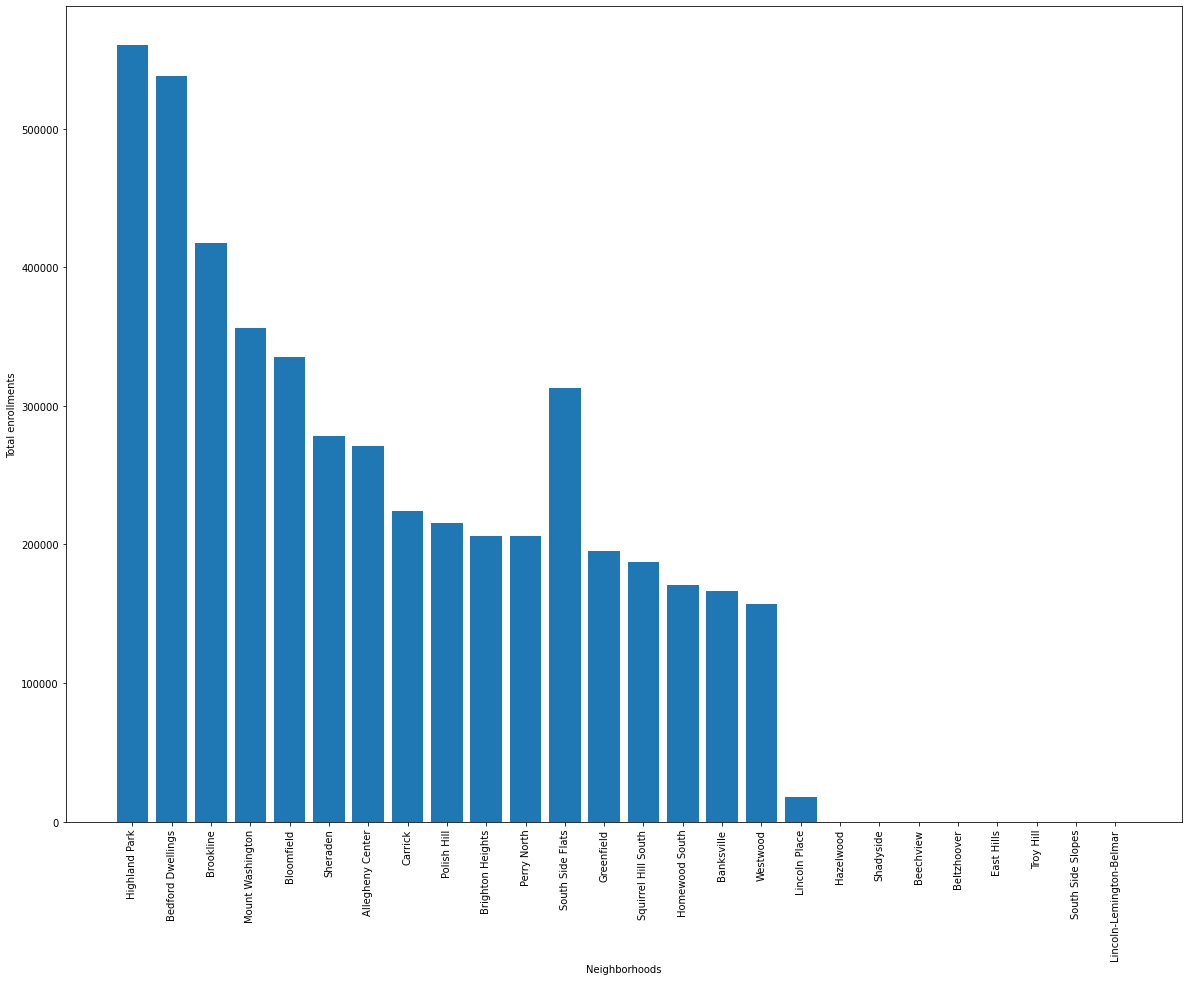

In [15]:

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)

plt.bar(keys_list, values_list);

plt.xticks(rotation ='vertical')

plt.xlabel('Neighborhoods')
plt.ylabel('Total enrollments')

plt.show()

## Summary

As we can tell from the bar diagram, Highland Park neighborhood has the largest capacity of pools. Therefore, Highland Park is the best neighborhood under the submetric stand of pool capacity. 